<a href="https://colab.research.google.com/github/JebinAbraham/CNN-PokemonPredict/blob/main/CNN_ImageClassification_PokemonDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
build me an image classficiation CNN model using the following dataset : https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types?resource=download

Here is all the data you need:
"pokemon.csv"

## Data loading

### Subtask:
Load the pokemon.csv file into a pandas DataFrame.


**Reasoning**:
Load the provided CSV file into a pandas DataFrame and display some basic information about it.



In [ ]:
image_dir = '/content/pokemon_dataset/images'  # Updated image directory path

In [ ]:
import pandas as pd

try:
    df_pokemon = pd.read_csv('pokemon.csv')
    display(df_pokemon.head())
    print(df_pokemon.shape)
    print(df_pokemon.info())
except FileNotFoundError:
    print("Error: 'pokemon.csv' not found. Please ensure the file is in the current directory or provide the correct path.")

,Name,Type1,Type2,Evolution
0,bulbasaur,Grass,Poison,ivysaur
1,ivysaur,Grass,Poison,venusaur
2,venusaur,Grass,Poison,NaN
3,charmander,Fire,NaN,charmeleon
4,charmeleon,Fire,NaN,charizard


(809, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       809 non-null    object
 1   Type1      809 non-null    object
 2   Type2      405 non-null    object
 3   Evolution  32 non-null     object
dtypes: object(4)
memory usage: 25.4+ KB
None


## Data exploration

### Subtask:
Explore the loaded Pokemon DataFrame (`df_pokemon`) to understand its contents.


**Reasoning**:
Analyze the distribution of Pokemon types, identify missing values and inconsistencies, and determine the dataset size. Generate a summary of the findings.



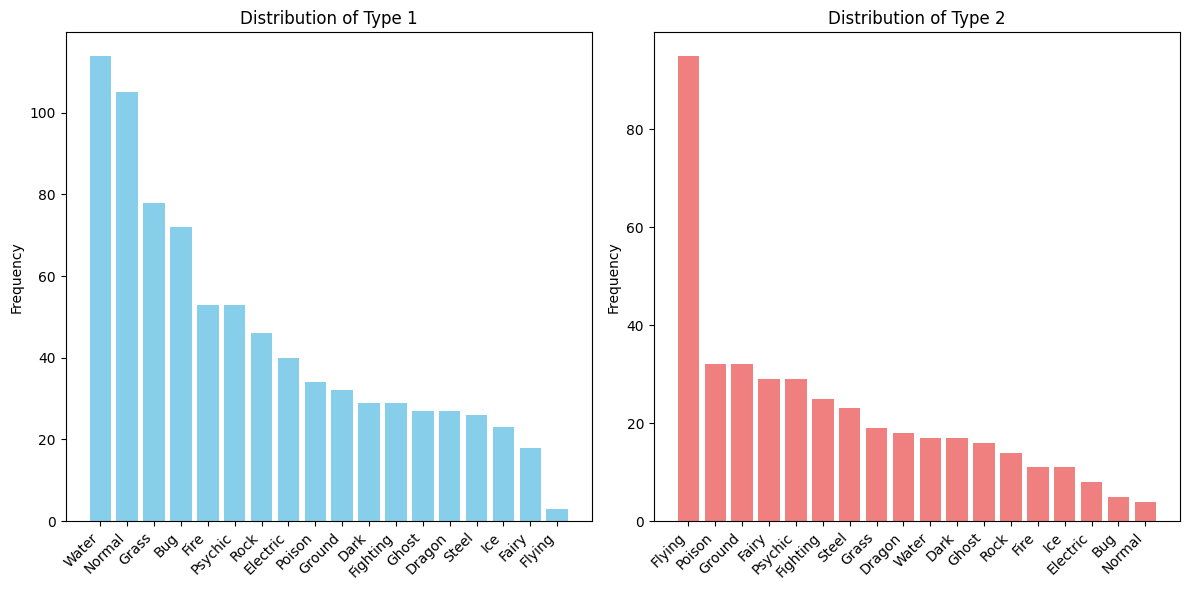

Missing values in 'Type2': 404 (49.94%)
Missing values in 'Evolution': 777 (96.04%)

Unique Type1 values: ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
Unique Type2 values: ['Poison' nan 'Flying' 'Ground' 'Fairy' 'Grass' 'Fighting' 'Psychic'
 'Steel' 'Ice' 'Rock' 'Water' 'Electric' 'Fire' 'Dragon' 'Dark' 'Ghost'
 'Bug' 'Normal']

Total number of unique Pokemon: 809
Total number of Pokemon in the dataset: 809

Summary:
The dataset contains information on 809 unique Pokemon with 809 entries. 
The 'Type2' column has a substantial number of missing values (49.94%), which might need to be addressed.
The distribution of 'Type1' and 'Type2' shows the prevalence of various Pokemon types. Further analysis can be done to identify any potential correlations between types.


In [ ]:
import matplotlib.pyplot as plt

# Analyze type distribution
type1_counts = df_pokemon['Type1'].value_counts()
type2_counts = df_pokemon['Type2'].value_counts()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(type1_counts.index, type1_counts.values, color='skyblue')
plt.title('Distribution of Type 1')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.bar(type2_counts.index, type2_counts.values, color='lightcoral')
plt.title('Distribution of Type 2')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Identify missing values
type2_missing = df_pokemon['Type2'].isnull().sum()
evolution_missing = df_pokemon['Evolution'].isnull().sum()
print(f"Missing values in 'Type2': {type2_missing} ({type2_missing / len(df_pokemon) * 100:.2f}%)")
print(f"Missing values in 'Evolution': {evolution_missing} ({evolution_missing / len(df_pokemon) * 100:.2f}%)")

#Check for inconsistencies
print(f"\nUnique Type1 values: {df_pokemon['Type1'].unique()}")
print(f"Unique Type2 values: {df_pokemon['Type2'].unique()}")

# Determine dataset size
unique_pokemon = df_pokemon['Name'].nunique()
total_pokemon = len(df_pokemon)

print(f"\nTotal number of unique Pokemon: {unique_pokemon}")
print(f"Total number of Pokemon in the dataset: {total_pokemon}")


# Summarize findings
print("\nSummary:")
print(f"The dataset contains information on {unique_pokemon} unique Pokemon with {total_pokemon} entries. ")
print(f"The 'Type2' column has a substantial number of missing values ({type2_missing / len(df_pokemon) * 100:.2f}%), which might need to be addressed.")
print("The distribution of 'Type1' and 'Type2' shows the prevalence of various Pokemon types. Further analysis can be done to identify any potential correlations between types.")


## Data preparation

### Subtask:
Prepare the image data and labels for model training.


**Reasoning**:
Load images, preprocess them, one-hot encode labels, and combine data and labels.



In [ ]:
!unzip /content/archive.zip -d /content/pokemon_dataset

Archive:  /content/archive.zip
  inflating: /content/pokemon_dataset/images/abomasnow.png  
  inflating: /content/pokemon_dataset/images/abra.png  
  inflating: /content/pokemon_dataset/images/absol.png  
  inflating: /content/pokemon_dataset/images/accelgor.png  
  inflating: /content/pokemon_dataset/images/aegislash-blade.png  
  inflating: /content/pokemon_dataset/images/aerodactyl.png  
  inflating: /content/pokemon_dataset/images/aggron.png  
  inflating: /content/pokemon_dataset/images/aipom.png  
  inflating: /content/pokemon_dataset/images/alakazam.png  
  inflating: /content/pokemon_dataset/images/alomomola.png  
  inflating: /content/pokemon_dataset/images/altaria.png  
  inflating: /content/pokemon_dataset/images/amaura.png  
  inflating: /content/pokemon_dataset/images/ambipom.png  
  inflating: /content/pokemon_dataset/images/amoonguss.png  
  inflating: /content/pokemon_dataset/images/ampharos.png  
  inflating: /content/pokemon_dataset/images/anorith.png  
  inflating: /

In [ ]:
import numpy as np
from PIL import Image
from sklearn.preprocessing import OneHotEncoder
import os
import pandas as pd

# 1. Unzip the dataset (if not already done)
!unzip /content/sample_data/pokemon-images-and-types.zip -d /content/pokemon_dataset

# 2. Load Images and handle missing images
image_data = []
labels_type1 = []
labels_type2 = []
image_dir = '/content/pokemon_dataset/images'  # Updated image directory path
if not os.path.exists(image_dir):
    print(f"Error: Image directory '{image_dir}' not found.")
    # Handle the error appropriately, e.g., exit the script or use a default dataset
    exit()

for index, row in df_pokemon.iterrows():
    pokemon_name = row['Name'].lower()
    image_path = os.path.join(image_dir, f"{pokemon_name}.png")

    if os.path.exists(image_path):
        try:
          img = Image.open(image_path).convert("RGB")
          img = img.resize((128, 128))
          img_array = np.array(img) / 255.0
          image_data.append(img_array)
          labels_type1.append(row['Type1'])
          labels_type2.append(row['Type2'])
        except Exception as e:
          print(f"Error processing image {image_path}: {e}")
    else:
        print(f"Image not found: {image_path}")

# 3. and 4. One-hot encode labels (handling missing Type2 values)
type1_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
type2_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

if len(labels_type1) > 0:
    type1_encoded = type1_encoder.fit_transform(np.array(labels_type1).reshape(-1,1))
    type2_encoded = type2_encoder.fit_transform(np.array([x if pd.notna(x) else 'Missing' for x in labels_type2]).reshape(-1,1))
else:
    print("No images found. Cannot one-hot encode labels.")
    exit()

# 5. Combine data and labels
image_data = np.array(image_data)
print(f"Image data shape: {image_data.shape}")
print(f"Type1 encoded shape: {type1_encoded.shape}")
print(f"Type2 encoded shape: {type2_encoded.shape}")

unzip:  cannot find or open /content/sample_data/pokemon-images-and-types.zip, /content/sample_data/pokemon-images-and-types.zip.zip or /content/sample_data/pokemon-images-and-types.zip.ZIP.
Image data shape: (809, 128, 128, 3)
Type1 encoded shape: (809, 18)
Type2 encoded shape: (809, 19)


In [ ]:
# save the type one and type 2 encoders
import pickle

# Save the type1_encoder
with open('type2_encoder.pkl', 'wb') as file:
    pickle.dump(type2_encoder, file)




In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Detect and initialize TPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy() # for CPU and single GPU

print("REPLICAS: ", strategy.num_replicas_in_sync)

# Model creation and training within TPU scope
with strategy.scope():
    # Define the CNN model
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(type1_encoder.categories_[0].shape[0], activation='softmax') # Output layer for Type1 prediction
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(image_data, type1_encoded, epochs=10, batch_size=32, validation_split=0.2)

REPLICAS:  1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 205ms/step - accuracy: 0.1260 - loss: 2.8389 - val_accuracy: 0.0864 - val_loss: 2.8684
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1809 - loss: 2.5490 - val_accuracy: 0.0864 - val_loss: 3.0828
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3072 - loss: 2.2269 - val_accuracy: 0.0988 - val_loss: 3.2669
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5213 - loss: 1.5806 - val_accuracy: 0.0926 - val_loss: 3.5623
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6576 - loss: 1.0684 - val_accuracy: 0.1235 - val_loss: 5.2211
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8169 - loss: 0.5798 - val_accuracy: 0.1173 - val_loss: 6.2595
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8705 - loss: 0.3607 - val_accuracy: 0.1296 - val_loss: 7.7256
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9563 - loss: 0.1607 - val_accuracy: 0.1296 - 

In [ ]:
# prompt: evaluate the model

# Evaluate the model
loss, accuracy = model.evaluate(image_data, type1_encoded, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Test Loss: 2.0494
Test Accuracy: 0.8109


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 18)                  │           2,322 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,920,888 (37.85 MB)

 Trainable params: 3,306,962 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,613,926 (25.23 MB)

In [ ]:
# prompt: Do a comprehensive evaluation of the model with samples

# Sample evaluation with a few Pokemon
import numpy as np
from PIL import Image

# ... (Your existing code) ...

# Function to predict the type of a single Pokemon image
def predict_pokemon_type(image_path):
    try:
        img = Image.open(image_path).convert("RGB")
        img = img.resize((128, 128))
        img_array = np.array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        prediction = model.predict(img_array)
        predicted_type_index = np.argmax(prediction)
        predicted_type = type1_encoder.categories_[0][predicted_type_index]
        return predicted_type
    except Exception as e:
        print(f"Error processing image: {e}")
        return None

# Example usage:
sample_pokemon = ["bulbasaur", "charmander", "squirtle", "pikachu", "mewtwo"]  #Names should be lowercase

for pokemon in sample_pokemon:
    image_path = os.path.join(image_dir, f"{pokemon}.png")
    predicted_type = predict_pokemon_type(image_path)
    if predicted_type:
        print(f"Pokemon: {pokemon.capitalize()}, Predicted Type: {predicted_type}")
    else:
        print(f"Could not predict the type for {pokemon}.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
Pokemon: Bulbasaur, Predicted Type: Grass
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Pokemon: Charmander, Predicted Type: Fire
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Pokemon: Squirtle, Predicted Type: Water
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Pokemon: Pikachu, Predicted Type: Electric
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Pokemon: Mewtwo, Predicted Type: Psychic


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


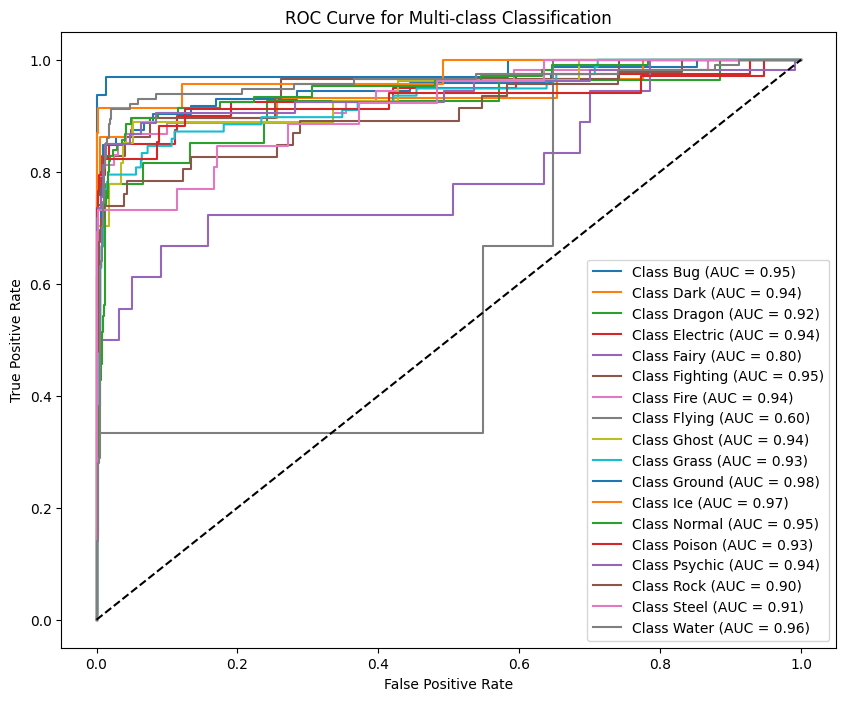

              precision    recall  f1-score   support

         Bug       0.84      0.85      0.84        72
        Dark       0.81      0.86      0.83        29
      Dragon       0.83      0.74      0.78        27
    Electric       0.82      0.80      0.81        40
       Fairy       1.00      0.44      0.62        18
    Fighting       0.88      0.76      0.81        29
        Fire       0.86      0.79      0.82        53
      Flying       1.00      0.33      0.50         3
       Ghost       0.90      0.70      0.79        27
       Grass       0.75      0.79      0.77        78
      Ground       0.79      0.94      0.86        32
         Ice       0.88      0.91      0.89        23
      Normal       0.80      0.85      0.82       105
      Poison       0.90      0.76      0.83        34
     Psychic       0.58      0.85      0.69        53
        Rock       0.85      0.72      0.78        46
       Steel       0.90      0.69      0.78        26
       Water       0.88    

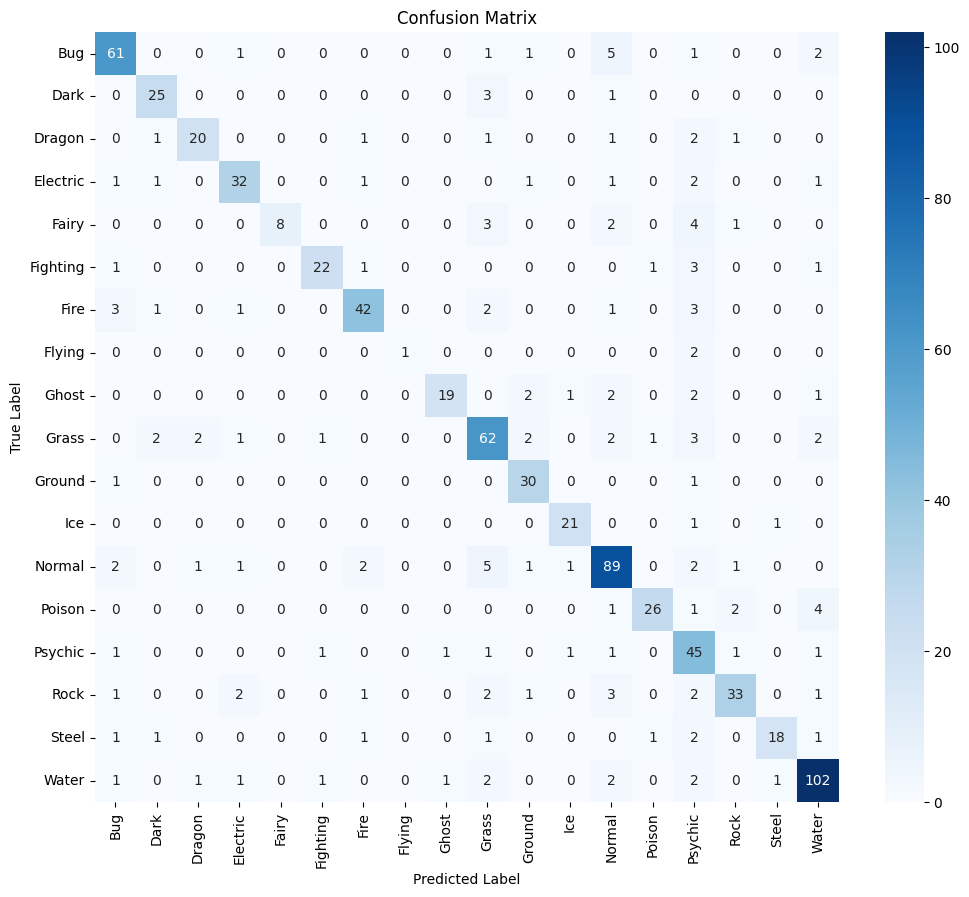

In [ ]:
# prompt: get the AUC ROC curve and all the evaluatio metrics

from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code) ...

# Assuming you have 'y_true' (true labels) and 'y_pred_probabilities' (predicted probabilities from model)
# Replace these with your actual values from model predictions
y_true = np.argmax(type1_encoded, axis =1)
y_pred_probabilities = model.predict(image_data)


# Calculate ROC AUC for each class
n_classes = type1_encoder.categories_[0].shape[0]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(type1_encoded[:, i], y_pred_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for all classes
plt.figure(figsize=(10, 8))
for i in range(n_classes):
  plt.plot(fpr[i], tpr[i], label=f'Class {type1_encoder.categories_[0][i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Classification')
plt.legend(loc='lower right')
plt.show()


# Predict class labels
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Generate classification report
print(classification_report(y_true, y_pred, target_names=type1_encoder.categories_[0]))

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=type1_encoder.categories_[0], yticklabels=type1_encoder.categories_[0])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# prompt: #save the model as a pickle file and show a sample on how to use it in production

import pickle

# Save the model
filename = 'pokemon_classifier_model.pkl'
pickle.dump(model, open(filename, 'wb'))

# Load the model (example for production use)
loaded_model = pickle.load(open(filename, 'rb'))

# Example usage in production:
def predict_pokemon_type_production(image_path, loaded_model):
    try:
        img = Image.open(image_path).convert("RGB")
        img = img.resize((128, 128))
        img_array = np.array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = loaded_model.predict(img_array)
        predicted_type_index = np.argmax(prediction)
        predicted_type = type1_encoder.categories_[0][predicted_type_index]
        return predicted_type
    except Exception as e:
        print(f"Error processing image: {e}")
        return None

# Example usage
sample_pokemon = ["bulbasaur", "charmander", "squirtle", "pikachu", "mewtwo"]  #Names should be lowercase

for pokemon in sample_pokemon:
    image_path = os.path.join(image_dir, f"{pokemon}.png")
    predicted_type = predict_pokemon_type_production(image_path, loaded_model)
    if predicted_type:
        print(f"Pokemon: {pokemon.capitalize()}, Predicted Type: {predicted_type}")
    else:
        print(f"Could not predict the type for {pokemon}.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
Pokemon: Bulbasaur, Predicted Type: Grass
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Pokemon: Charmander, Predicted Type: Fire
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Pokemon: Squirtle, Predicted Type: Water
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Pokemon: Pikachu, Predicted Type: Electric
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Pokemon: Mewtwo, Predicted Type: Psychic
